In [22]:
import pandas as pd
import numpy as np

In [23]:
dtrain = pd.read_csv('C:/Anaconda/lab5/train.csv')
dtest = pd.read_csv('C:/Anaconda/lab5/test.csv')

In [24]:
from sklearn import cross_validation

x_train, x_valid, y_train, y_valid = cross_validation.train_test_split(
dtrain.drop(('label'), axis=1).astype('float32')/255.0,        
dtrain['label'],                                              
test_size = 0.2,
random_state = 11)

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model = Sequential()
model.add(Dense(800, input_dim=x_train.shape[1], activation="relu", kernel_initializer="normal", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(600, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=400)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 14s 421us/step - loss: 6.4097 - acc: 0.8833 - val_loss: 1.6182 - val_acc: 0.9401
Epoch 2/10
33600/33600 [==============================] - 13s 399us/step - loss: 0.7987 - acc: 0.9455 - val_loss: 0.4339 - val_acc: 0.9450
Epoch 3/10
33600/33600 [==============================] - 13s 396us/step - loss: 0.3104 - acc: 0.9563 - val_loss: 0.2856 - val_acc: 0.9544
Epoch 4/10
33600/33600 [==============================] - 14s 403us/step - loss: 0.2527 - acc: 0.9595 - val_loss: 0.2686 - val_acc: 0.9554
Epoch 5/10
33600/33600 [==============================] - 13s 386us/step - loss: 0.2279 - acc: 0.9629 - val_loss: 0.2362 - val_acc: 0.9627
Epoch 6/10
33600/33600 [==============================] - 14s 407us/step - loss: 0.2114 - acc: 0.9664 - val_loss: 0.2247 - val_acc: 0.9620
Epoch 7/10
33600/33600 [==============================] - 14s 430us/step - loss: 0.2032 - acc: 0.9677 - val_loss: 0.2

In [28]:
predictions = model.predict_classes(dtest, verbose=0)

In [29]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("predictions.csv", index=False, header=True)

In [30]:
import pickle

LRmodel = pickle.load(open('LearnedLRmodel.sav', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'LearnedLRmodel.sav'

In [31]:
from sklearn import metrics

metrics.accuracy_score(LRmodel.predict(x_valid), y_valid)

0.6403571428571428

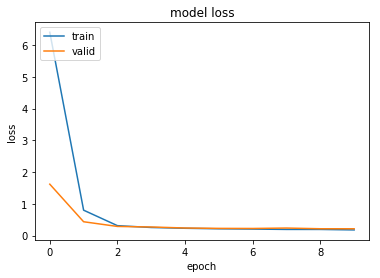

In [32]:
#сеть получилась лучше, чем логрег

import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()